In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import cv2 as cv
import cv2
from scipy.signal import convolve
from operator import itemgetter

In [2]:
img = cv2.imread('assets/download (1).png')
b, g, r = cv2.split(img)

In [16]:
b_energy_sobel = np.absolute(cv2.filter2D(b, -1, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
                                + cv2.filter2D(b, -1, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])))
g_energy_sobel = np.absolute(cv2.filter2D(g, -1, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
                                + cv2.filter2D(g, -1, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])))
r_energy_sobel = np.absolute(cv2.filter2D(r, -1, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
                                + cv2.filter2D(r, -1, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])))

b_energy_scharr = np.absolute(cv2.filter2D(b, -1, np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]]))
                                + cv2.filter2D(b, -1, np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])))
g_energy_scharr = np.absolute(cv2.filter2D(g, -1, np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]]))
                                + cv2.filter2D(g, -1, np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])))
r_energy_scharr = np.absolute(cv2.filter2D(r, -1, np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]]))
                                + cv2.filter2D(r, -1, np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])))

b_energy_prewitt = np.absolute(cv2.filter2D(b, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
                                + cv2.filter2D(b, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])))
g_energy_prewitt = np.absolute(cv2.filter2D(g, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
                                + cv2.filter2D(g, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])))
r_energy_prewitt = np.absolute(cv2.filter2D(r, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
                                + cv2.filter2D(r, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])))


def canny_filter(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
    # find the angle and magnitude of the gradient
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Non-max suppression
    nms = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if (ang[i, j] >= 0 and ang[i, j] < 45) or (ang[i, j] >= 180 and ang[i, j] < 225):
                if mag[i, j] >= mag[i, j+1] and mag[i, j] >= mag[i, j-1]:
                    nms[i, j] = mag[i, j]
            elif (ang[i, j] >= 45 and ang[i, j] < 90) or (ang[i, j] >= 225 and ang[i, j] < 270):
                if mag[i, j] >= mag[i+1, j-1] and mag[i, j] >= mag[i-1, j+1]:
                    nms[i, j] = mag[i, j]
            elif (ang[i, j] >= 90 and ang[i, j] < 135) or (ang[i, j] >= 270 and ang[i, j] < 315):
                if mag[i, j] >= mag[i+1, j] and mag[i, j] >= mag[i-1, j]:
                    nms[i, j] = mag[i, j]
            else:
                if mag[i, j] >= mag[i-1, j-1] and mag[i, j] >= mag[i+1, j+1]:
                    nms[i, j] = mag[i, j]

    # Double thresholding
    high_threshold = np.percentile(nms, 90)
    low_threshold = high_threshold * 0.5
    strong_edges = (nms >= high_threshold)
    weak_edges = ((nms <= high_threshold) & (nms >= low_threshold))

    # Hysteresis
    final_img = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if strong_edges[i, j]:
                final_img[i, j] = 255
            elif weak_edges[i, j]:
                if ((strong_edges[i-1:i+2, j-1:j+2]).any()):
                    final_img[i, j] = 255

    return final_img

                            
prewitt = b_energy_prewitt + g_energy_prewitt + r_energy_prewitt
scharr = b_energy_scharr+ g_energy_scharr+ r_energy_scharr
sobel = b_energy_sobel + g_energy_sobel + r_energy_sobel
canny = canny_filter(img)


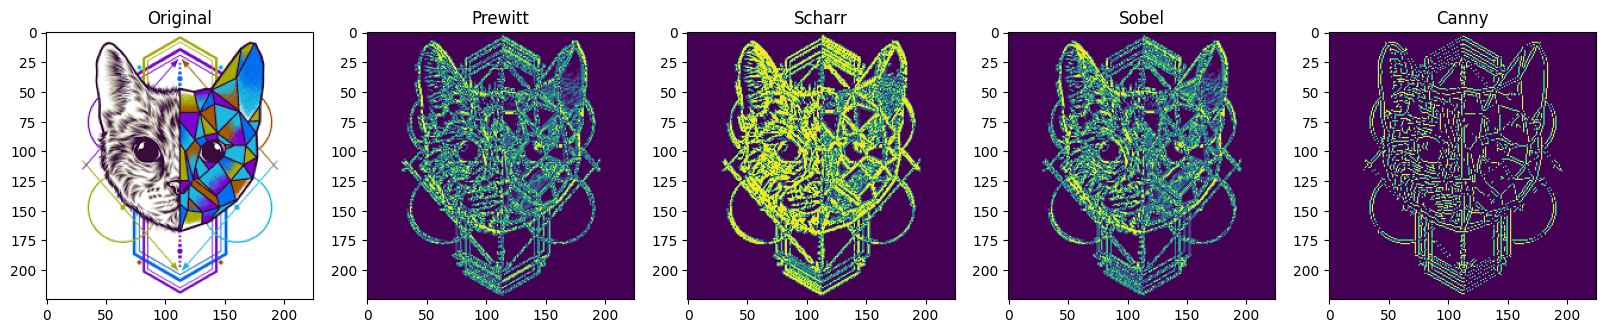

In [17]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(prewitt)
plt.title('Prewitt')

plt.subplot(1, 5, 3)
plt.imshow(scharr)
plt.title('Scharr')

plt.subplot(1, 5, 4)
plt.imshow(sobel)
plt.title('Sobel')

plt.subplot(1, 5, 5)
plt.imshow(canny)
plt.title('Canny')

plt.show()

Text(0.5, 1.0, 'Original Image')

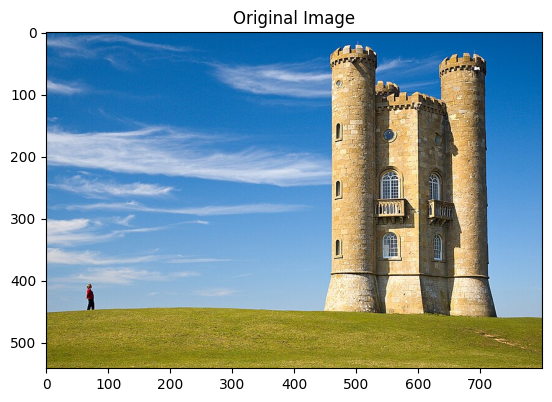

In [5]:
# Function to convert images from BGR (OpenCV) to RGB (matplotlib)
def BGR2RGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Open image
testImg = cv.imread("Image/tower.jpg")

# Display image
plt.figure()
plt.imshow(BGR2RGB(testImg))
plt.title("Original Image")

Text(0.5, 1.0, 'Carving Demo')

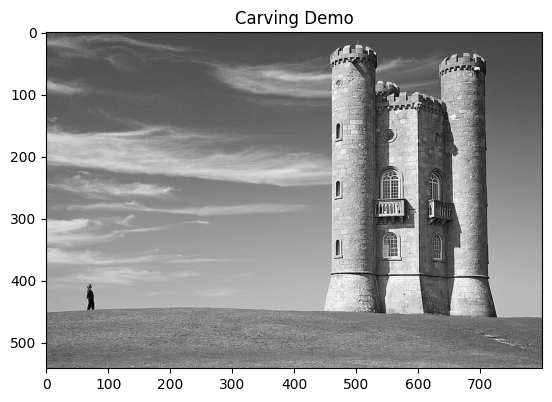

In [6]:
# Open image
carvingDemo = cv.cvtColor(cv.imread("Image/tower.jpg"), cv.COLOR_BGR2GRAY)

# Display image
plt.figure()
plt.imshow(BGR2RGB(carvingDemo))
plt.title("Carving Demo")

Text(0.5, 1.0, 'Sobel Edges')

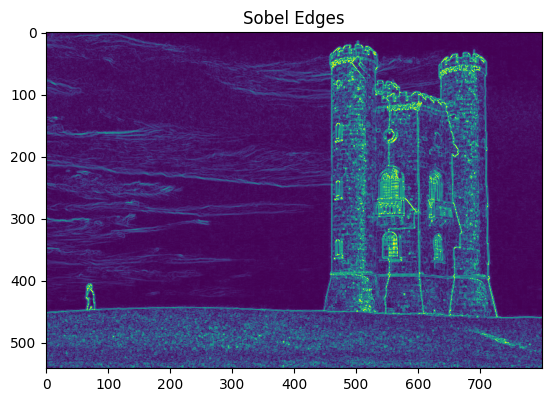

In [19]:
def SobelEdges(img, kernelSize):
    # Apply sobel operator for x and y axis
    sobelX = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=kernelSize)
    sobelY = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=kernelSize)
    absX = cv.convertScaleAbs(sobelX)
    absY = cv.convertScaleAbs(sobelY)

    # Combine the two images
    edges = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

    return edges

imagetobeshown = SobelEdges(carvingDemo, 3)
plt.figure()
plt.imshow(imagetobeshown)
plt.title("Sobel Edges")

Text(0.5, 1.0, 'Carving Line (sum = 74179)')

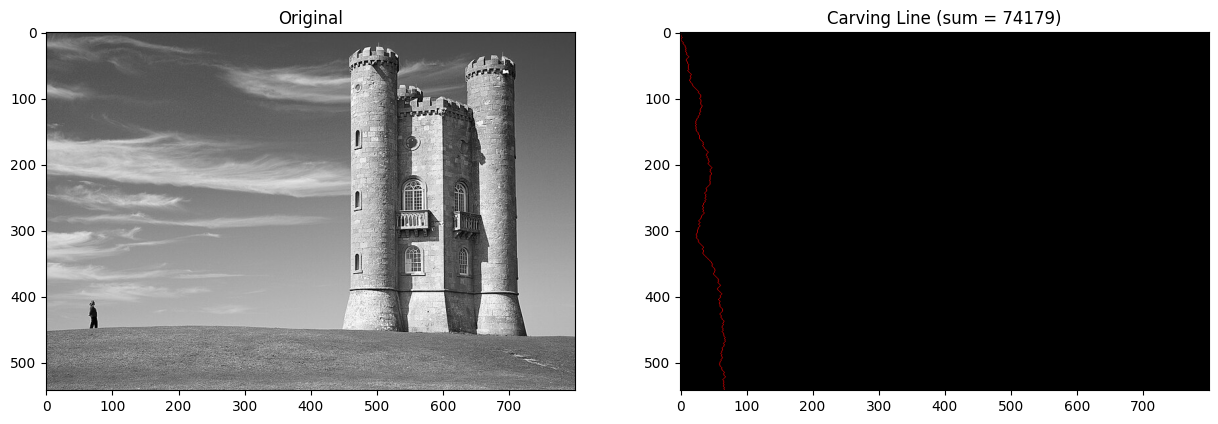

In [8]:
def FindCarvingLine(img, x):
    # Get dimensions of image
    height, width = img.shape

    # Carving line coordinates
    carvingLine = [(0,x)]
    sum = 0

    # Iterate through the image rows
    for i in range(height-1):
        # Get pixel values of neighbours
        values = []
        for neighbourX in range(3):
            neighbourX = x + (neighbourX - 1)
            if neighbourX >= 0 and neighbourX < width:
                neighbourCoordinates = (i+1, neighbourX)
                neighbourValue = img[neighbourCoordinates]
                values.append([neighbourValue, neighbourX])
        
        # Choose neighbour with lowest value
        lowest = [255, -1]
        for neighbour in values:
            if neighbour[0] <= lowest[0]:
                lowest = neighbour
        
        # Add to sum
        sum = sum + lowest[0]

        # Repeat with new coordinates
        carvingLine.append((i+1, lowest[1]))
        x = lowest[1]
    
    # Return the line and the sum
    return carvingLine, sum

# Get carving line
newLine, sum = FindCarvingLine(carvingDemo, 0)

# Create debug image with line points
annotated = np.zeros((carvingDemo.shape[0], carvingDemo.shape[1], 3), np.uint8)
for point in newLine:
    annotated[point] = (0,0,255)

# Display
_, (x1, x2) = plt.subplots(1, 2, figsize=(15, 15))
x1.imshow(BGR2RGB(carvingDemo))
x1.set_title("Original")

x2.imshow(BGR2RGB(annotated))
x2.set_title("Carving Line (sum = " + str(sum) + ")")

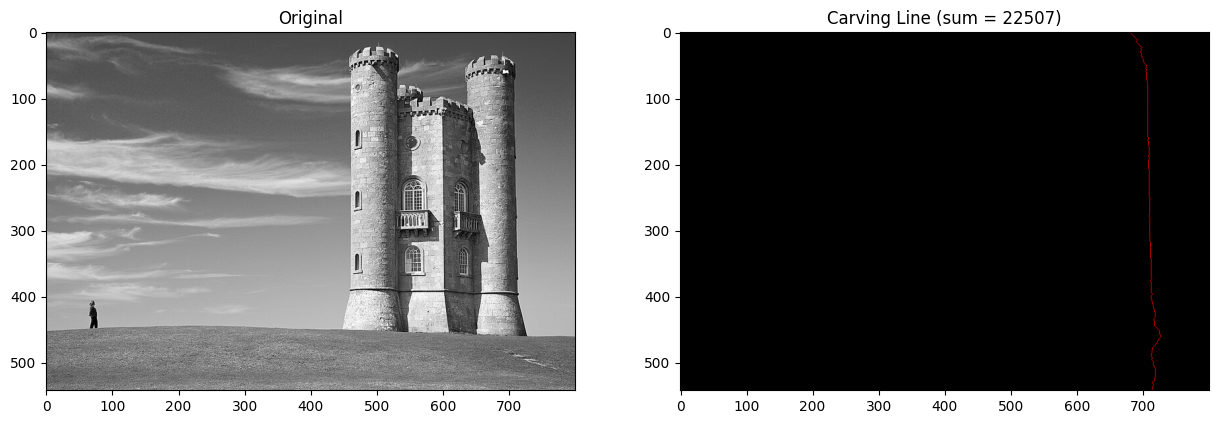

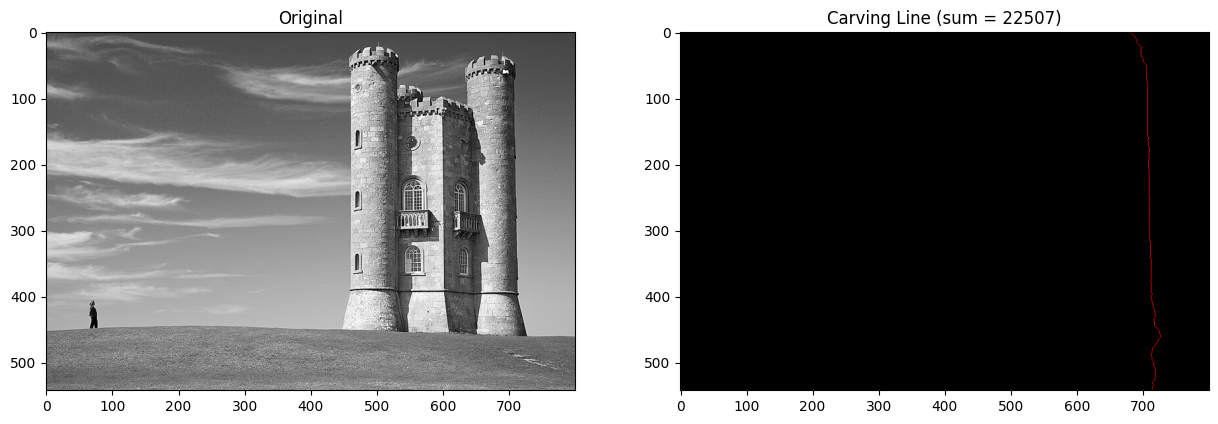

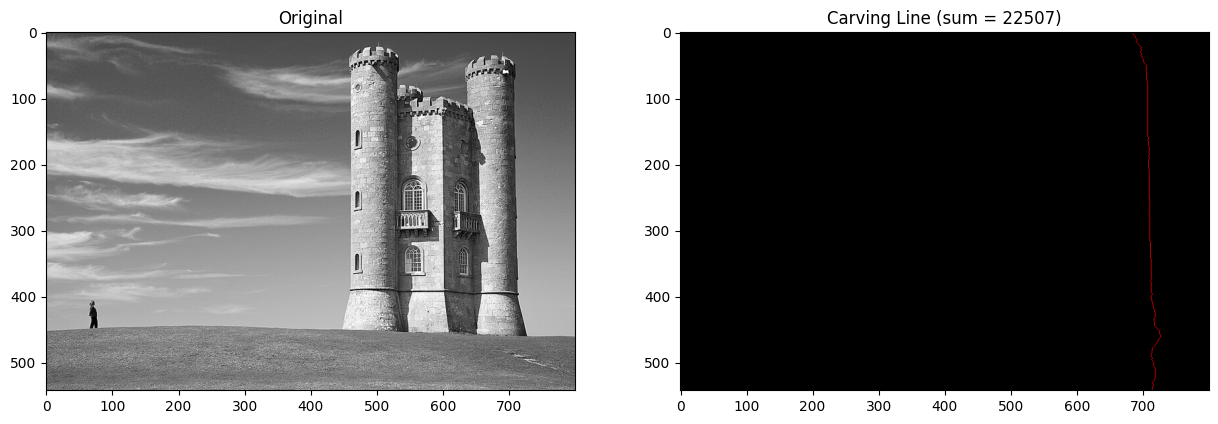

In [28]:
# Generate all carving lines
carvingLines = []
for x in range(carvingDemo.shape[1]):
    line, sum = FindCarvingLine(carvingDemo, x)
    carvingLines.append((line, sum))

# Sort by sum
carvingLines = sorted(carvingLines, key=itemgetter(1))

for i in range(3):
    # Get carving line
    newLine = carvingLines[i][0]

    # Create debug image with line points
    annotated = np.zeros((carvingDemo.shape[0], carvingDemo.shape[1], 3), np.uint8)
    for point in newLine:
        annotated[point] = (0,0,255)

    # Display
    _, (x1, x2) = plt.subplots(1, 2, figsize=(15, 15))
    x1.imshow(BGR2RGB(carvingDemo))
    x1.set_title("Original")

    x2.imshow(BGR2RGB(annotated))
    x2.set_title("Carving Line (sum = " + str(carvingLines[i][1]) + ")")
    
    
    
# ------------------- storing ------------------- #
import imageio

# Initialize a list to store the images
images = []

for i in range(0,100):
    # Get carving line
    newLine = carvingLines[i][0]

    # Create debug image with line points
    annotated = np.zeros((carvingDemo.shape[0], carvingDemo.shape[1], 3), np.uint8)
    for point in newLine:
        annotated[point] = (0,0,255)

    # Append the image to the list
    images.append(annotated)

# show the animation
imageio.mimsave('animation.gif', images, fps=100)

Text(0.5, 1.0, 'Resized (542, 799)')

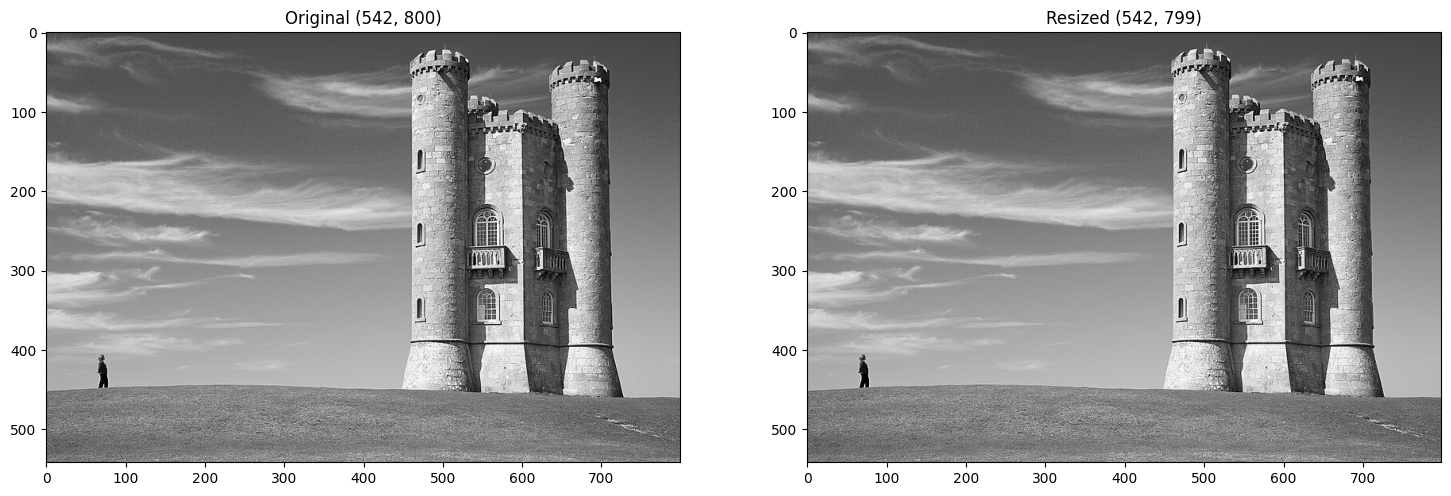

In [10]:
def ShiftPixels(x, y, width, img):
    if x+1 < width:
        img[y, x] = img[y, x+1]
        img = ShiftPixels(x+1, y, width, img)
    return img

def RemovePoints(line, img):
    # Create copy image
    copy = img.copy()

    # Get image dimensions
    height, width = img.shape[:2]

    # Get x,y of each point
    for point in line[0]:
        y = point[0]
        x = point[1]

        # Shift neighbouring pixels to the left (if applicable)
        copy = ShiftPixels(x,y,width,copy)
    
    # Remove last collumn
    copy = copy[0:height, 0:width-1]

    return copy

resized = RemovePoints(carvingLines[0], carvingDemo)

# Display
_, (x1, x2) = plt.subplots(1, 2, figsize=(18, 6))
x1.imshow(BGR2RGB(carvingDemo))
x1.set_title("Original " + str(carvingDemo.shape))

x2.imshow(BGR2RGB(resized))
x2.set_title("Resized " + str(resized.shape))
